In [1]:
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
from collections import OrderedDict
import time
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font',**font) 

In [2]:
def sorted_percentage(df,feature,dict_trait):
    '''
    The function takes in
    a dataframe that consists
    of traits and a particular
    feature and returns the sorted percenatage
    per trait category
    ----------
    df : pandas Dataframe
        Consists of traits of
        the NFTs.
    feature : String
        Name of the feature
        that we want to plot.
    dict_trait: Dictionary (Counter)
        Contains the number of
        type of traits.
    Returns
    -------
    sorted_percentage
    '''
    assert isinstance(df,pd.DataFrame)
    assert isinstance(feature,str)
    assert isinstance(dict_trait,Counter)
    
    traits = set(('Background','Fur','Mouth','Eyes','Earring','Clothes','Hat'))
    
    assert feature in traits
    
    values = Counter(df[feature].values.flatten())
    
    percentage = Counter({key: values[key]*100/dict_trait[key] for key in values})
    
    percentage_list = sorted(percentage.items(),key=lambda i:i[1],reverse=True)
    sorted_percentage = dict({k:v for k,v in percentage_list})
    return sorted_percentage

def run_percentage(x):
    '''
    this function takes in a data frame and returns
    a dictionary with sorted percentages of each trait category
    :param: x
    :type: DataFrame
    :return: dict
    '''
    traits_list = ['Background','Fur','Mouth','Eyes','Earring','Clothes','Hat']
    per_dict = {}
    for i in traits_list:
        per_dict[i] = sorted_percentage(x,i,dictt[i])
    return per_dict

In [3]:
def plot(df,feature,dict_trait):
    '''
    The function takes in
    a dataframe that consists
    of traits and a particular
    feature that we want
    to plot as a histogram.
    Parameters
    ----------
    df : pandas Dataframe
        Consists of traits of
        the NFTs.
    feature : String
        Name of the feature
        that we want to plot.
    dict_trait: Dictionary (Counter)
        Contains the number of
        type of traits.
    Returns
    -------
    None.
    '''
    
    
    percentage_list = sorted_percentage(df,feature, dict_trait)
    
    plt.figure(figsize=(20,3))
    plt.bar(percentage_list.keys(),percentage_list.values(),width=0.5)
    plt.ylabel('Percentage of the trait type')
    plt.xticks(range(len(percentage_list)),percentage_list.keys(),rotation=75)
    plt.title(feature)
    plt.show()

In [4]:
def types_of_traits(trait_pd):
    '''
    The function takes in 
    the trait Pandas Data Frame
    and returns a dictionary 
    of dictionaries that 
    has the keys as the traits
    and each key has a dictionary
    associated with it. These
    dictionaries contain the count
    of each type of trait.
    Parameters
    ----------
    trait : pd.DataFrame
        Data Frame that contains 
        different traits.
    Returns
    -------
    dict.
    '''
    assert isinstance(trait_pd,pd.DataFrame)

    dictt = {}

    traits = set(('Background','Fur','Mouth','Eyes','Earring','Clothes','Hat'))

    for trait in traits:

        df = trait_pd[trait]
        values = Counter(df.values.flatten())
        dictt[trait] = values

    return dictt

In [5]:
def grouping(value):
    '''
    Function returns the
    group number depending
    on range. If value is 0
    return 0. If value is in
    [1,4] return 1, [5,9] return
    2 and [10,14] return 3
    Parameters
    ----------
    value : int
    Returns
    -------
    Group by value.
    '''
    
    if value in range(0,2):         # if the value is 0 or 1
        return '0'
    if value in range(4,15):        # if the value is 5 to 15 inclusive [5,15]
        return '1'

In [12]:
sale_headers = ['TokenID']                                                                          # create column names for sales data
for i in range(15):
    sale_headers.append('sale'+str(i))
trait_headers = ['TokenID','Background','Fur','Mouth','Eyes','Earring','Clothes','Hat']             # create column names for trait data


trait_data = pd.read_csv('trait_data_file.csv')                                                     # load trait_data
dictt=types_of_traits(trait_data)                                                                   # load trait dictionary which has the number of each trait per trait category

listing_headers = ['TokenID','Price']
listing_data = pd.read_csv('listing_data.csv',names=listing_headers)
listing_data = listing_data.set_index('TokenID')

fur_floor_data = pd.read_csv('fur_floors.csv',names=['fur_trait','floor'])           # load fur floor data from the correct directory
fur_floor_data = fur_floor_data.set_index('fur_trait')
eye_floor_data = pd.read_csv('Eyes_floors.csv',names=['eye_trait','floor'])          # load eye floor data from the correct directory
eye_floor_data = eye_floor_data.set_index('eye_trait')


sales_data = pd.read_csv('sales_data.csv',names=sale_headers)                                       # load sales_data
sales_data = sales_data.set_index('TokenID')                                                        # set index by the tokenID
count = sales_data.count(axis='columns')                                                            # count number of sales per token
trait_none = trait_data.replace(to_replace='None', value=np.nan)                                    # replace None strings with NaN
trait_count = trait_none.count(axis='columns')                                                                                                                        
tcf = trait_count.to_frame('Trait_Count')
tcf_ids = tcf.index
tcf['TokenID'] = tcf_ids
tcf = tcf.set_index('TokenID')
trait_count_frame = tcf
tcf = pd.concat([tcf, listing_data], axis=1)
tcf = tcf.dropna()
tcf = tcf.pivot(columns='Trait_Count')
tcf = tcf['Price']
tcf = tcf.rename(columns = {5:4,6:5,7:6,8:7})
tc_dict = {}
for i in range(4,8,1):
    tc_dict[i] = tcf[i].min()
tc_floors = pd.DataFrame.from_dict(tc_dict,orient='index',columns=['Floors'])

In [13]:
groups = count.groupby(by=lambda i:grouping(count.loc[i]))
zero_to_one_index = groups.get_group('0').index                           
zero_to_one_index = zero_to_one_index[1:]
zero_to_one_traits = trait_data.iloc[zero_to_one_index]                     
five_to_fifteen_index = groups.get_group('1').index
five_to_fifteen_traits = trait_data.iloc[five_to_fifteen_index]              

C:\Users\ivans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


0.7550460300614479 Outliers included


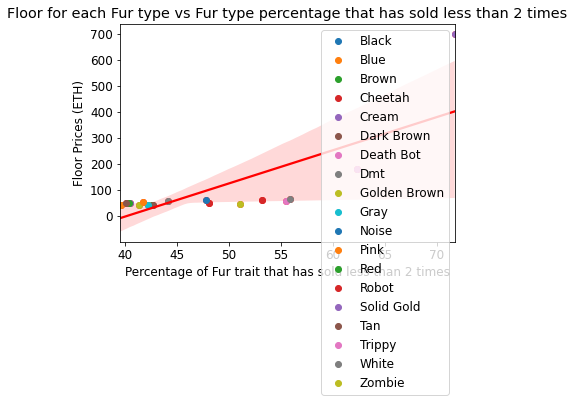

In [14]:
per_dict = run_percentage(zero_to_one_traits)                               # generate percentage of each trait that has sold less than 2 times 

fur_items = per_dict['Fur'].items()                                         # pluck out Fur percentages
fur_list = list(fur_items)                              
ff = pd.DataFrame(fur_list,columns=['fur_trait','percentage'])              # Load this data into a Dataframe
ff = ff.set_index('fur_trait')                                              
ff = pd.concat([ff, fur_floor_data], axis=1)                                # Join floor data and percentage data
ff_col = 'Floor Prices (ETH)'                                               # rename cols for plotting
fp_col = 'Percentage of Fur trait that has sold less than 2 times'          # rename cols for plotting
ff = ff.rename(columns= {'floor':ff_col,'percentage':fp_col})               # rename columns for plots                                                              
ff['cat'] = ff.index                                                        # add indexes as col for easy reference
ff_groups = ff.groupby(ff['cat'])                                           # put each fur type into its own category

for name, group in ff_groups:
    plt.plot(group[fp_col], group[ff_col], marker="o", linestyle="", label = name)                # scatter plot
plt.legend()
plt.title('Floor for each Fur type vs Fur type percentage that has sold less than 2 times')
sns.regplot(ff[fp_col],ff[ff_col],color='r')                                                      # line of best fit                                                           
print(ff[fp_col].corr(ff[ff_col]),'Outliers included')

C:\Users\ivans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Floor for each Eye type vs Eye type percentage that has sold 4 or more times')

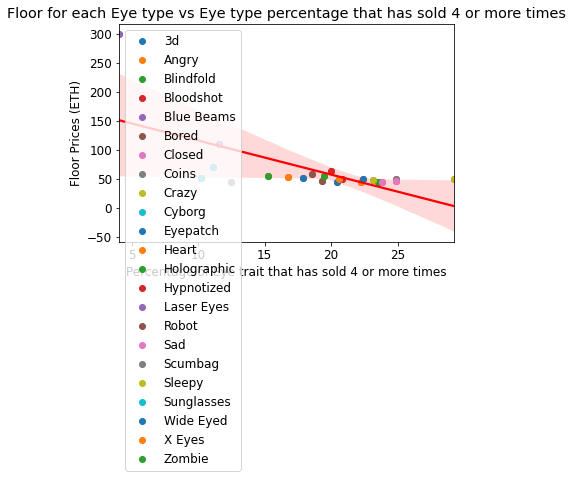

In [15]:
'''
rerun graphs but this time run them for a different sales frequency and differt trait category
sales frequency: 4 or more times
trait category : Eyes
'''
per_dict_least = run_percentage(five_to_fifteen_traits)                                         # plot bar graph for each trait category (sold 4 or more times)
eye_items = per_dict_least['Eyes'].items()                                                      # pluck out eye percentages
eye_list = list(eye_items)                              
ef = pd.DataFrame(eye_list,columns=['eye_trait','percentage'])                                  # Load this data into a Dataframe
ef = ef.set_index('eye_trait')
ef = pd.concat([ef, eye_floor_data], axis=1)                                                    # Join floor data and percentage data
ep_col = 'Percentage of Eye trait that has sold 4 or more times'
ef_col = 'Floor Prices (ETH)'
ef = ef.rename(columns= {'floor':ef_col,'percentage':ep_col})                                   # rename column names for plotting purposes 
ef['cat'] = ef.index                                                                            # add indexes as col for easy reference
ef_groups = ef.groupby(ef['cat'])                                                               # put each eye trait into its own column for plotting
for name, group in ef_groups:
    plt.plot(group[ep_col], group[ef_col], marker="o", linestyle="", label = name)              # scatter plot
plt.legend()
sns.regplot(ef[ep_col],ef[ef_col],color='r')  
plt.title('Floor for each Eye type vs Eye type percentage that has sold 4 or more times')                                                   # line of best fit                                                                

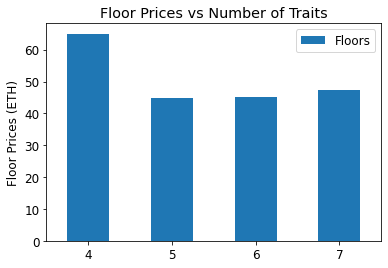

In [16]:
tc_floors.plot.bar(rot=0)
plt.ylabel('Floor Prices (ETH)')
plt.title('Floor Prices vs Number of Traits')
plt.show()

         Floors
Earring   47.47
Clothes   47.47
Hat       47.47


Text(0.5, 1.0, 'Floor Prices vs 5 trait optionals')

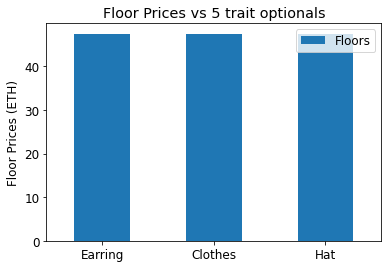

In [17]:
tcf5 = trait_count_frame                                                                                            # copy the trait_count_frame
tcf5 = tcf5[tcf5.Trait_Count != 4]
tcf5 = tcf5[tcf5.Trait_Count != 6]
tcf5 = tcf5[tcf5.Trait_Count != 7]                                                                                  # drop every trait count but 5 traits
tcf5 = pd.concat([tcf5, listing_data], axis=1)                                                                      # add the listing data for each 5 trait on sale
tcf5 = tcf5.dropna()                                                                                                
trait_data['TokenID'] = trait_data.index
trait_data = trait_data.set_index('TokenID')
onsale5 = pd.concat([tcf5,trait_data],axis=1)                                                                       # merge the traits for each 5 trait on sale into one df
onsale5 = onsale5.dropna()
onsale5 = onsale5.drop(columns=['Trait_Count','Fur','Mouth','Eyes','Background'])                                   # only keep the relevant data (what trait cat is the fifth trait)
onsale5 = onsale5.replace(to_replace='None', value=np.nan)
ear_f = onsale5.drop(columns=['Clothes','Hat'])                                                                     # create earring frame for 5T earring
clot_f = onsale5.drop(columns=['Earring','Hat'])                                                                    # create clothes frame for 5T clothes
hat_f = onsale5.drop(columns=['Clothes','Earring'])                                                                 # create hat frame for 5T hat
ear_f = ear_f.dropna()
clot_f = clot_f.dropna()
hat_f = hat_f.dropna()
count5_dict = {'Earring':ear_f['Price'].min(),'Clothes':clot_f['Price'].min(),'Hat':hat_f['Price'].min()}           # store the floor for each 5 trait optional

t5_floors = pd.DataFrame.from_dict(count5_dict,orient='index',columns=['Floors'])                                   # store data into its own df for plotting
print(t5_floors)
t5_floors.plot.bar(rot=0)                                                                                           
plt.ylabel('Floor Prices (ETH)')
plt.title('Floor Prices vs 5 trait optionals')